In [1]:
import os
import pandas as pd
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
import matplotlib.pyplot as plt

In [2]:
files = [f for f in os.listdir('.') if os.path.isfile(f) & f.endswith('.csv')]
for f in files:
    print(f)


Data Log Feb 20 2020 10_48 AM.csv


In [3]:
import_cols = [
    'Frame Time (h:m:s.ms)',
    'AUX.ACCEL.FORWARD Gs',
    'AUX.ACCEL.LATERAL Gs',
    'AUX.GPS.LATITUDE °', 
    'AUX.GPS.LONGITUDE °', 
    'SAE.MAP inHg', 
    'SAE.RPM rpm', 
    'SAE.VSS km/h', 
    'CALC.FC.FUEL_VOLUME gal (US) | gal (UK)', 
    'CALC.FC.IFC l/100km',
    'CALC.ENGINE_POWER hp',
    'CALC.GEAR Cur, Sug, Ind, Num',
    'SAE.ECT °C'
]

col_names = [
    'Time',
    'Acceleration', 
    'Acceleration_Lat',
    'Lat', 
    'Lon', 
    'Man_pressure', 
    'RPM', 
    'Speed', 
    'Fuel_Flow', 
    'Fuel_Total', 
    'Power',
    'Gear',
    'Temp'
]

rename_col = dict(zip(import_cols,col_names))

In [4]:
trip_df = pd.read_csv( 'Data Log Feb 20 2020 10_48 AM.csv', usecols=import_cols, low_memory=False)



trip_df = trip_df.drop(0)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
trip_df.rename(columns=rename_col, inplace=True)




#update the data types for numeric and datetime associated  data
numeric_col = ['Acceleration', 'Lat', 'Lon', 'Man_pressure', 'RPM', 'Speed', 'Fuel_Flow', 'Fuel_Total', 'Power','Temp']
trip_df[numeric_col] = trip_df[numeric_col].apply(pd.to_numeric, errors='coerce', axis=1)
trip_df['Time'] = pd.to_datetime(trip_df['Time'], format='%H:%M:%S.%f')

trip_df.sort_values(by=['Time'], inplace=True, ascending=True)


print(trip_df[100:110])

                       Time  Acceleration Acceleration_Lat       Lat      Lon  \
102 1900-01-01 00:00:10.403         -0.01            -0.08  47.34523 -1.79779   
101 1900-01-01 00:00:10.503         -0.01            -0.08  47.34522 -1.79779   
103 1900-01-01 00:00:10.526         -0.01            -0.08  47.34523 -1.79779   
104 1900-01-01 00:00:10.689         -0.01            -0.08  47.34523 -1.79779   
105 1900-01-01 00:00:10.824         -0.01            -0.08  47.34523 -1.79779   
106 1900-01-01 00:00:10.928         -0.01            -0.08  47.34523 -1.79779   
107 1900-01-01 00:00:11.035         -0.00            -0.09  47.34523 -1.79779   
108 1900-01-01 00:00:11.138          0.00            -0.09  47.34523 -1.79779   
109 1900-01-01 00:00:11.243          0.01            -0.09  47.34523 -1.79779   
110 1900-01-01 00:00:11.344          0.01            -0.09  47.34523 -1.79779   

       RPM  Man_pressure  Fuel_Flow  Fuel_Total     Gear  Power  Speed  Temp  
102  660.0          28.3     

In [5]:
trip_df = trip_df[100:9800]
#trip_df = trip_df.set_index('Time')
trip_df

Time  Acceleration Acceleration_Lat       Lat  \
102  1900-01-01 00:00:10.403         -0.01            -0.08  47.34523   
101  1900-01-01 00:00:10.503         -0.01            -0.08  47.34522   
103  1900-01-01 00:00:10.526         -0.01            -0.08  47.34523   
104  1900-01-01 00:00:10.689         -0.01            -0.08  47.34523   
105  1900-01-01 00:00:10.824         -0.01            -0.08  47.34523   
...                      ...           ...              ...       ...   
9796 1900-01-01 00:14:33.846          0.00            -0.07  47.34528   
9797 1900-01-01 00:14:33.946          0.00            -0.07  47.34528   
9798 1900-01-01 00:14:34.046          0.00            -0.07  47.34528   
9799 1900-01-01 00:14:34.146          0.00            -0.07  47.34528   
9800 1900-01-01 00:14:34.246          0.00            -0.07  47.34528   

          Lon    RPM  Man_pressure  Fuel_Flow  Fuel_Total     Gear  Power  \
102  -1.79779  660.0          28.3        1.4         NaN  0,0,0,6    2.0   
101  -1.79779  660.0          28.3        1.4         NaN  0,0,0,6    2.0   
103  -1.79779  660.0          28.3        1.4         NaN  0,0,0,6    2.0   
104  -1.79779  658.0          28.3        1.4         NaN  0,0,0,6    2.0   
105  -1.79779  658.0          28.3        1.4         NaN  0,0,0,6    2.0   
...       ...    ...           ...        ...         ...      ...    ...   
9796 -1.79785  652.0          28.3        2.5         NaN  0,0,0,6    3.0   
9797 -1.79785  652.0          28.3        2.5         NaN  0,0,0,6    3.0   
9798 -1.79785  652.0          28.3        2.5         NaN  0,0,0,6    3.0   
9799 -1.79785  652.0          28.3        2.5         NaN  0,0,0,6    3.0   
9800 -1.79785  652.0          28.3        2.5         NaN  0,0,0,6    3.0   

      Speed   Temp  
102     0.0    NaN  
101     0.0    NaN  
103     0.0    NaN  
104     0.0    NaN  
105     0.0    NaN  
...     ...    ...  
9796    0.0  103.0  
9797    0.0  103.0  
9798    0.0  103.0  
9799    0.0  103.0  
9800    0.0  103.0  

[9700 rows x 13 columns]

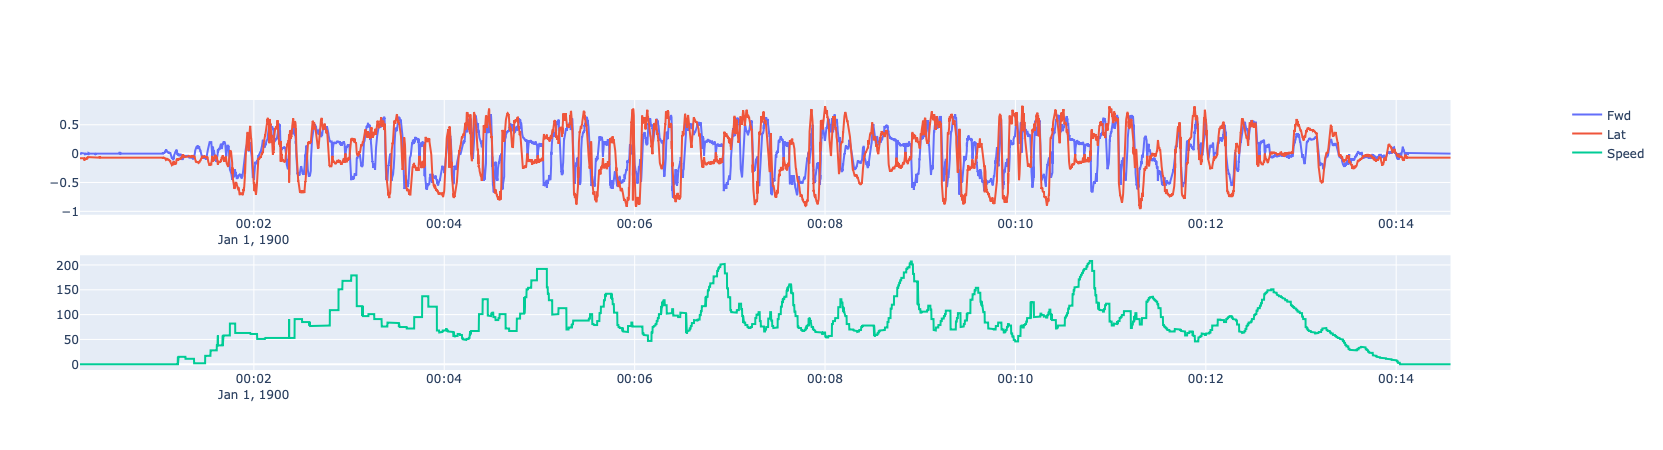

In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=2, cols=1,
                    specs=[[{"secondary_y": True}],
                           [{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=trip_df['Time'], y=trip_df['Acceleration'],
                    mode='lines',
                    name='Fwd'),  row=1, col=1)

fig.add_trace(go.Scatter(x=trip_df['Time'], y=trip_df['Acceleration_Lat'],
                    mode='lines',
                    name='Lat'),  row=1, col=1)

fig.add_trace(go.Scatter(x=trip_df['Time'], y=trip_df['Speed'],
                    mode='lines',
                    name='Speed'),  row=2, col=1, secondary_y=False)

fig.show()


In [7]:
frameTime = 1000/24
print(frameTime)

41.666666666666664


In [8]:
class Frame: 
    def __init__(self, index, ref_time):
        self.index = index
        self.ref_time = ref_time
   
    def __repr__(self):
        return "Frame {}, ({})\n  - speed :{}".format(self.index, self.ref_time, self.speed)

frame_index = 0
offset = None
frames = []
first = None
prev = None

time = 0

for index, row in trip_df.iterrows():
       
    if (prev is not None):
       
        row_timestamp =  (row['Time'].minute * 60 + row['Time'].second) * 1000*1000 + row['Time'].microsecond
        prev_timestamp = (prev['Time'].minute * 60 + prev['Time'].second) * 1000*1000 + prev['Time'].microsecond
        
        diff = row_timestamp - prev_timestamp
        diff = diff/1000
        
        
        while (time*1000 + offset) < row_timestamp:
            #print("Time: {}".format(time))
            time = time + frameTime

            # add frame
            frame = Frame(frame_index, frame_index *(1000/24))
            frame_index = frame_index + 1
            
            frame.speed = row['Speed']
            frame.gear = row['Gear']
            frame.power = row['Power']
            frame.temp = row['Temp']
            frame.RPM = row['RPM']
            
            frame.acc = row['Acceleration']
            frame.acc_lat = row['Acceleration_Lat']
            frame.lat = row['Lat']
            frame.long = row['Lon']
            
            frames.append(frame)
        
    else:
        first = row
        offset = row['Time'].second * 1000 * 1000 + row['Time'].microsecond
        print("Offset:", offset)
        
    # Create frames
    
        
    prev = row

    

Offset: 10403000


In [9]:
width = 1280
height = 720
FPS = 24
seconds = 10

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./overlay.avi', fourcc, float(FPS), (width, height))

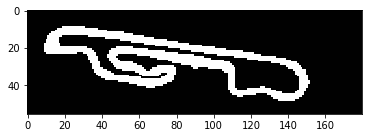

In [17]:
locations = []
for f in frames: 
    locations.append([f.long,-f.lat])
    
    
locations = np.array(locations)
mins = locations.min(axis=0)
mins
locations = locations - mins;
locations = locations *10000
locations  = locations  + 10
maximas = locations.max(axis=0)


trackmap =  np.ones(shape=[int(maximas[1]*1.20), int(maximas[0]*1.20), 3], dtype=np.uint8)

cv2.drawContours(trackmap, [np.int32(locations)], -1, (255,255,255), 2)

plt.imshow(trackmap)
plt.show()


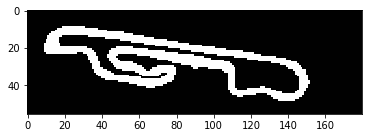

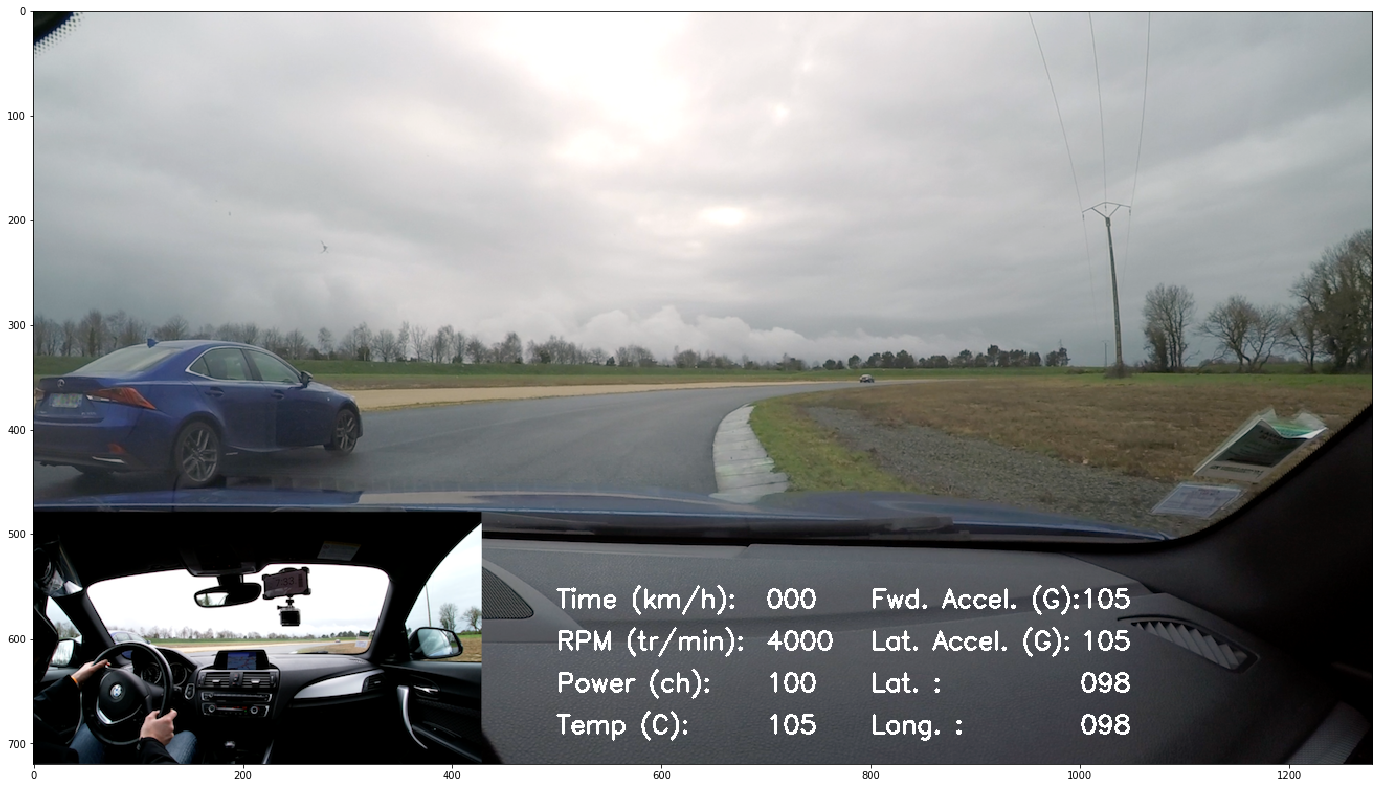

In [38]:

frame =  np.ones(shape=[height, width, 3], dtype=np.uint8)

image = cv2.imread("vid.png")

img2 = trackmap
img1 = frame

rows,cols,channels = trackmap.shape
roi = frame[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(trackmap,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(trackmap,trackmap,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


plt.imshow(trackmap)
plt.show()


frame = frame * (0,255,0)

frame = np.int32(frame)


cv2.putText(image,"Time (km/h): ",(500,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"000",(700,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

cv2.putText(image,"RPM (tr/min): ",(500,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"4000",(700,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


cv2.putText(image,"Power (ch): ",(500,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"100",(700,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

cv2.putText(image,"Temp (C): ",(500,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"105",(700,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


cv2.putText(image,"Fwd. Accel. (G): ",(800,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"105",(1000,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


cv2.putText(image,"Lat. Accel. (G): ",(800,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"105",(1000,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


cv2.putText(image,"Lat. : ",(800,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"098",(1000,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


cv2.putText(image,"Long. : ",(800,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
cv2.putText(image,"098",(1000,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)



plt.figure(figsize=(24,14))
plt.imshow(image[:,:,::-1])
plt.show()

In [11]:
for f in frames:

    frame =  np.ones(shape=[height, width, 3], dtype=np.uint8)
    frame = frame * (0,255,0)
    frame = np.uint8(frame)

    cv2.putText(frame,"Gear : ",(500,530),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,f.gear,(700,530),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

    cv2.putText(frame,"Speed (km/h): ",(500,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.speed),(700,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

    cv2.putText(frame,"RPM (tr/min): ",(500,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.RPM),(700,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


    cv2.putText(frame,"Power (ch): ",(500,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.power),(700,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

    cv2.putText(frame,"Temp (C): ",(500,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.temp),(700,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

    cv2.putText(frame,"Time: ",(800,530),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(pd.to_timedelta(f.ref_time, unit="ms"))[7:-3],(1000,530),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    
    cv2.putText(frame,"Fwd. Accel. (G): ",(800,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.acc),(1000,570),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


    cv2.putText(frame,"Lat. Accel. (G): ",(800,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.acc_lat),(1000,610),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)

    cv2.putText(frame,"Lat. : ",(800,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.lat)[0:8],(1000,650),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)


    cv2.putText(frame,"Long. : ",(800,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)
    cv2.putText(frame,str(f.long)[0:8],(1000,690),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255, 255, 255, 255),2)    
    
    video.write(frame)
video.release()